# Predicting Hotel Booking Cancelation

## Source Dataset
> https://www.kaggle.com/jessemostipak/hotel-booking-demand

## Background
> Reservation cancellation is not uncommon in the hotel industry. Each cancellation means a lost revenue opportunity that can never be recovered. When working at the front desk at an airport hotel, we had to call each guest to confirm if they will show up in the afternoon. If they confirm that they cannot show up, we could try to sell the room again. This practice ensures the revenue to a certain degree. However, it is not sufficient to call each guest in the afternoon since a majority of guests check-in during the afternoon.
Therefore, if we can predict if a guest would cancel a reservation, hotels could contact guests that most likely to cancel to confirm more efficiently and to resell the room to optimize revenues.

## Aims & Goals
> - To perform exploratory data analysis in order to extract any valuable information
- To build a predictive model to predict the hotel booking cancelation.

## Scope of the dataset

> Feature : 
- Hotel : Hotel (H1 = Resort Hotel or H2 = City Hotel)
- is_canceled : Value indicating if the booking was canceled (1) or not (0)
- lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- arrival_date_year : Year of arrival date
- arrival_date_month : Month of arrival date
- arrival_date_week_number : Week number of year for arrival date
- arrival_date_day_of_month : Day of arrival date
- stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- adults : Number of adults
- children : Number of children
- babies : Number of babies
- meal : 	Type of meal booked. Categories are presented in standard hospitality meal packages
- country : Country of origin. Categories are represented in the ISO 3155–3:2013 format
- market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)
- previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking
- previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking
- reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons
- assigned_room_type : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons
- booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- deposit_type : Indication on if the customer made a deposit to guarantee the booking
- agent : ID of the travel agency that made the booking
- company : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer
- customer_type : Type of booking
- adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- required_car_parking_spaces : Number of car parking spaces required by the customer
- total_of_special_requests : Number of special requests made by the customer (e.g. twin bed or high floor)
- reservation_status : 	Reservation last status
- reservation_status_date : Date at which the last status was set.


## Importing Libraries & Dataset

In [4]:
#Basic Library
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set_style(style ='whitegrid')
import re
import nltk
from nltk.corpus import wordnet, stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
])

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
print('Set up complete')

Set up complete


In [5]:
df = pd.read_csv('C:/Users/ID20113/Documents/Python/Module-2/hotel_bookings.csv')

## Getting know about the data

- This data set were extracted from hotels’ Property Management System (PMS) SQL databases which contains booking information for a city hotel located in the city of Lisbon and a resort hotel at the resort region of Algarve
- Both hotels are located in Portugal, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

In [6]:
df.head(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The dataset contains 8,523 entries with some missing values 

In [8]:
df.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
is_canceled,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [9]:
df.nunique().sort_values(ascending=False)

adr                               8879
reservation_status_date            926
lead_time                          479
company                            352
agent                              333
country                            177
days_in_waiting_list               128
previous_bookings_not_canceled      73
arrival_date_week_number            53
stays_in_week_nights                35
arrival_date_day_of_month           31
booking_changes                     21
stays_in_weekend_nights             17
previous_cancellations              15
adults                              14
assigned_room_type                  12
arrival_date_month                  12
reserved_room_type                  10
market_segment                       8
total_of_special_requests            6
children                             5
distribution_channel                 5
babies                               5
meal                                 5
required_car_parking_spaces          5
customer_type            

Observation:
- There are 2 hotels, 3 deposit types, 3 reservation status types, and 4 customer types
- The 'adr' seems not an unique value, it is understandable since adr is the average daily rate as a sum of all lodging transactions divided by total number of staying nights.
- Customers are from 177 different countries

## Checking Null Value

In [10]:
total = df.isnull().sum().sort_values(ascending=False).head(15)
total

company                      112593
agent                         16340
country                         488
children                          4
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
is_canceled                       0
market_segment                    0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
dtype: int64

#### 'Company' attribute

In [11]:
df['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
229.0      1
213.0      1
416.0      1
320.0      1
461.0      1
Name: company, Length: 352, dtype: int64

<b>Company</b> : ID of the company/entity that made the booking or responsible for paying the booking. For NULL values, It can be intrepete as hotel being booked personally. So in this case, I'll impute "NULL" with 0

#### 'Agent' attribute

In [12]:
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

<b>Agent</b> : It is the same case with the 'Company' case, so It can be intrepete as hotel being reserved personally. So in this case, I'll impute "NULL" with 0

#### 'Country' attribute

In [13]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
FJI        1
DMA        1
HND        1
NPL        1
ASM        1
Name: country, Length: 177, dtype: int64

<b>Country</b> : Country of origin.For reservation with unspecified country, I'll impute with "UNK" as short for Unknown

#### 'Children' attribute

In [14]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

<b>Children</b> : Number of children. Most of reservation included no children. So I'll impute missing values with 0.

## Impute Missing & Wrong Value & Dropping Column

In [15]:
df[df['adr']<0].sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [16]:
df = df[df.adr > 0]

In [17]:
Nan_handling = {'company': 0,
                'agent' : 0,
                'country' : 'UNK',
                'children' : 0
               }
df = df.fillna(value = Nan_handling)
df = df.replace({'CN':'CHN'}) #update China ISO naming from CN to CHN

In [18]:
df['is_canceled'].value_counts(normalize=True)

0    0.625215
1    0.374785
Name: is_canceled, dtype: float64

In [19]:
df['reservation_status'].value_counts(normalize=True)

Check-Out    0.625215
Canceled     0.364728
No-Show      0.010057
Name: reservation_status, dtype: float64

In [20]:
df.drop(columns=['reservation_status'],inplace=True)
df.dropna(axis=0,inplace=True)

is_canceled & reservation_status provide same information, we can drop reservation_status for model building purpose

In [21]:
df.loc[:, 'total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df.loc[:, 'price'] = df['adr'] * df['total_nights']

## Exploratory Data Analysis (EDA)

### Correlation between features

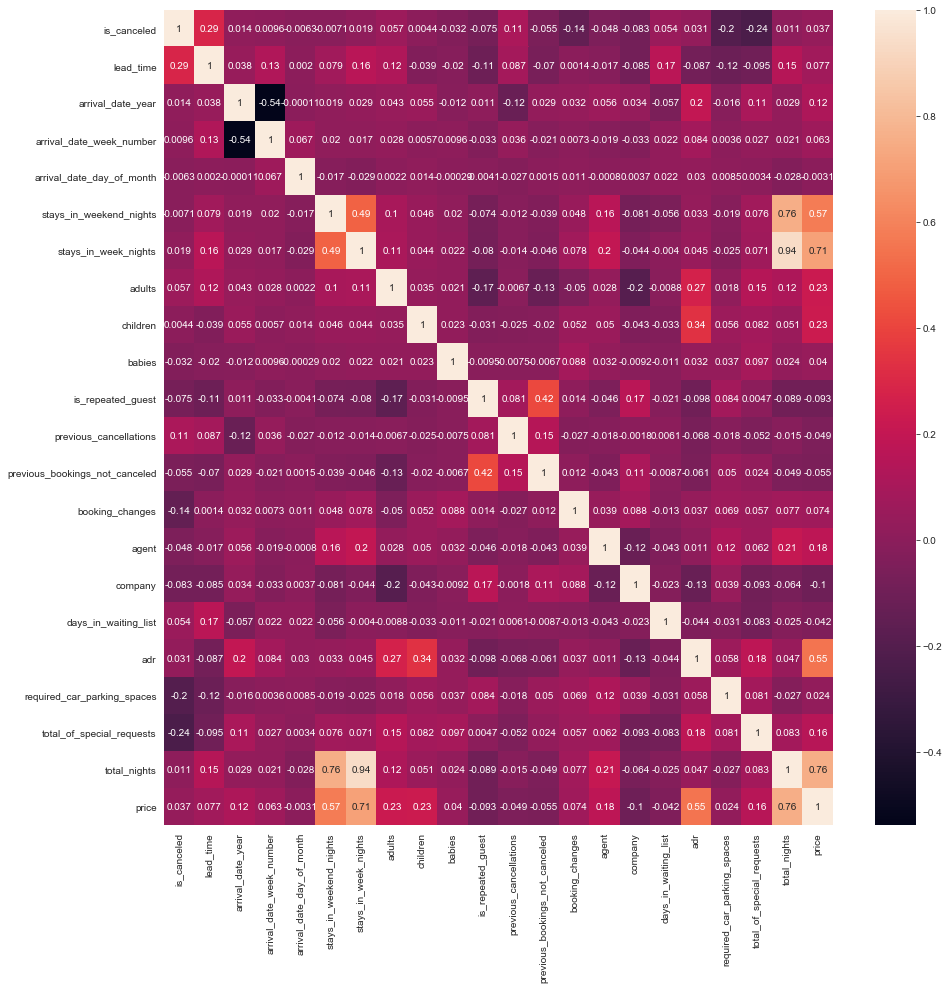

In [22]:
f,ax=plt.subplots(figsize=(15,15))
data_nms=df
sns.heatmap(data_nms.corr(),annot=True)

Observation:
- It looks like there is no strong correlation between variables. The highest one only reach +0.5 form correlation between days_in_weekend_nights and stays_in_week_nights

### Which hotel has more cancelations?

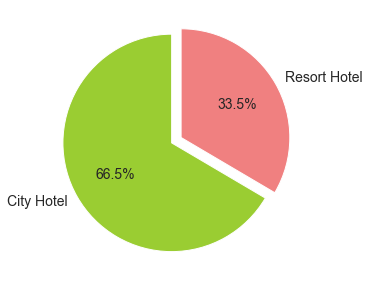

In [23]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 5,5

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = df['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

In [24]:
df['hotel'].value_counts()

City Hotel      78122
Resort Hotel    39308
Name: hotel, dtype: int64

Text(0, 0.5, 'Canceled or Not Canceled')

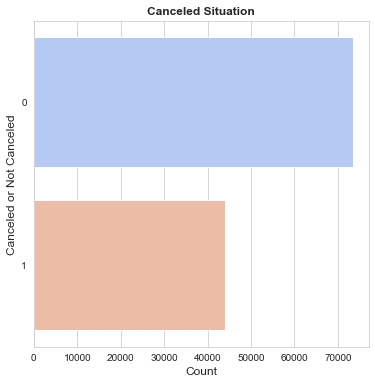

In [25]:
# `is_canceled` graph

plt.figure(figsize=(6,6))
sns.countplot(y='is_canceled', data= df, palette='coolwarm', orient = 'v')
plt.title('Canceled Situation', weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Canceled or Not Canceled', fontsize=12)

In [26]:
df['is_canceled'].value_counts(normalize=True)

0    0.625215
1    0.374785
Name: is_canceled, dtype: float64

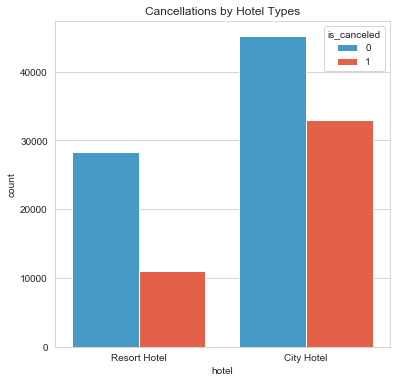

In [27]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellations by Hotel Types')
sns.countplot(x='hotel',hue='is_canceled',data=df)
plt.show()

In [28]:
# % of cancellations in Resort Hotel
df[df['hotel']=='Resort Hotel']['is_canceled'].value_counts(normalize=True)

0    0.719192
1    0.280808
Name: is_canceled, dtype: float64

In [29]:
# % of cancellations in City Hotel
df[df['hotel']=='City Hotel']['is_canceled'].value_counts(normalize=True)

0    0.577929
1    0.422071
Name: is_canceled, dtype: float64

Observation :
- Therea are two hotels in the dataset which are City Hotel and Resort Hotel.
- City Hotel has 32.8% more visitor than Resort Hotel. I assume cheaper price in City Hotel led people to choose them over Resort Hotel
- Even though City Hotel has more visitor, they also has higher booking cancelation 41.7% compared to Resort Hotel 27.7% 
- In total there is 37% booking cancelation from all the booking data

### Where are the visitors come from?

[Text(0, 0.5, 'country'), Text(0.5, 0, 'No. of visitor')]

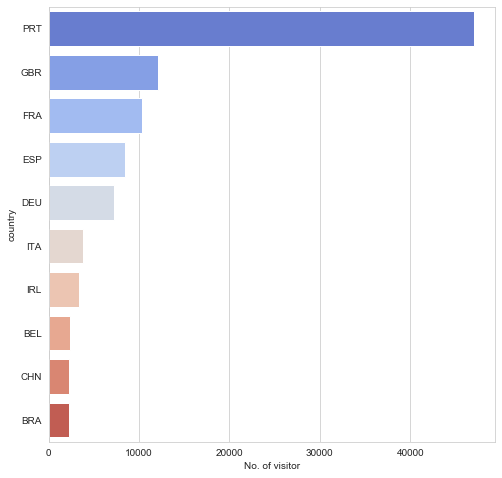

In [30]:
cdf = df.groupby('country').size().reset_index(name='country_count').sort_values('country_count', ascending = False).head(10)

fig, ax = plt.subplots(figsize = (8,8))
sns.barplot(x = 'country_count', y = 'country', data = cdf, palette = 'coolwarm',ax=ax)
ax.set(xlabel = 'No. of visitor', ylabel = 'country')

Observation :
- Most visitors are from Portugal then followed by Great Britain, France, Spain, and Netherlands
- It is understandable because the two hotels are located in Portugal, so it's not that surprising the majority of visitors are from Portugal and other Europe countries

### Does lead time affects cancelation?

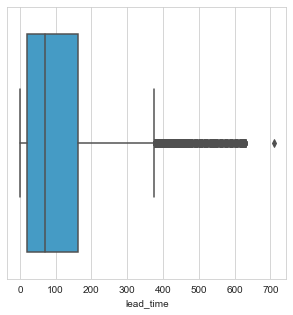

In [31]:
sns.boxplot(x = df['lead_time'])


In [32]:
df['lead_time'].describe()

count    117430.000000
mean        105.084340
std         106.907012
min           0.000000
25%          19.000000
50%          71.000000
75%         162.000000
max         709.000000
Name: lead_time, dtype: float64

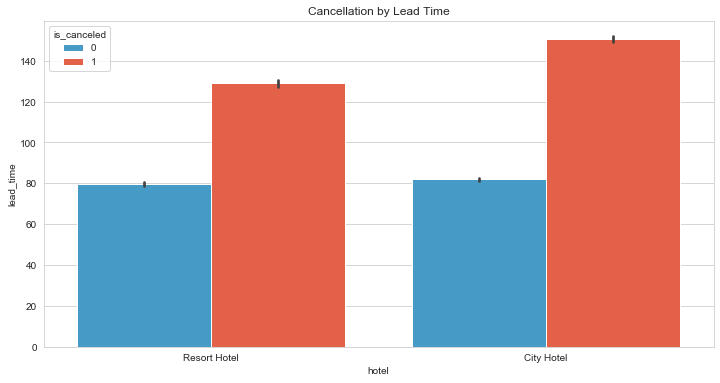

In [33]:
plt.figure(figsize=(12,6))
plt.title(label='Cancellation by Lead Time')
sns.barplot(x='hotel',y='lead_time',hue='is_canceled',data=df)
plt.show()

Observation:
- It can be seen that on average potential visitors book a room about 100 days before the day of reservation
- Looks like the longer the lead time, the reservation is more likely to be canceled 
- I conclude that most visitors reserved a room about 2 months (60 days) in advance

### Does total member affects cancelation?

In [34]:
# Merge 
df['kids'] = df.children + df.babies
df['total_members'] = df['kids'] + df['adults']

In [35]:
df.total_members.value_counts()

2.0     81239
1.0     21725
3.0     10407
4.0      3893
5.0       132
0.0        31
12.0        2
10.0        1
Name: total_members, dtype: int64

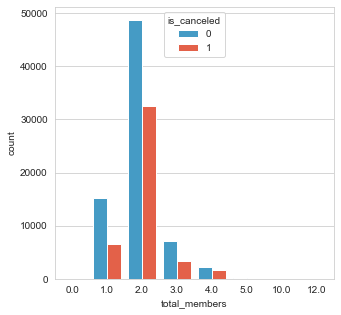

In [36]:
sns.countplot(x = 'total_members', data = df, hue = 'is_canceled')

In [37]:
u = df[np.logical_and(df['is_canceled']!=0, df['total_members']>=6)]
len(u)

1

In [38]:
u2 = df[np.logical_and(df['is_canceled']==0, df['total_members']>=6)]
len(u2)

2

Observation :
- Total member of 2 people has the highest number of cancelation, this is understandable since majority of visitors are couples (2-person)
- It is interesting that the total member of more than 5 people are prone to cancel (15 vs 2)

### Does deposit type affects cancelation?

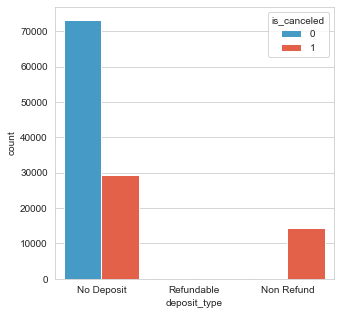

In [39]:
sns.countplot(x = 'deposit_type', data = df, hue = 'is_canceled') 

In [40]:
(df[df['is_canceled'] == 1])['deposit_type'].value_counts()


No Deposit    29481
Non Refund    14494
Refundable       36
Name: deposit_type, dtype: int64

In [41]:
(df[df['is_canceled'] == 0])['deposit_type'].value_counts()


No Deposit    73200
Refundable      126
Non Refund       93
Name: deposit_type, dtype: int64

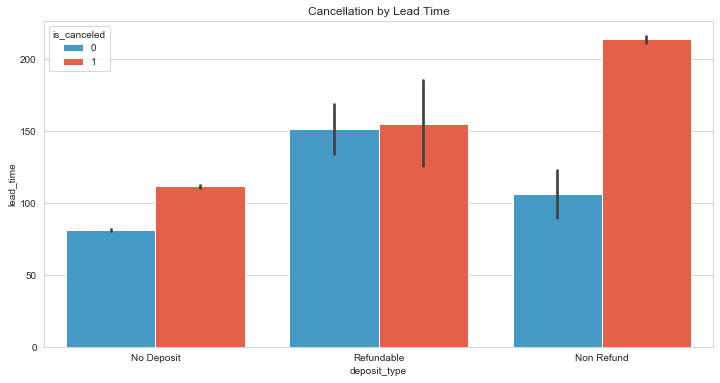

In [42]:
plt.figure(figsize=(12,6))
plt.title(label='Cancellation by Lead Time')
sns.barplot(x='deposit_type',y='lead_time',hue='is_canceled',data=df)
plt.show()

Observation :
- Most of reservation require no deposit, while some were non-refundable
- It is very interesting that reservations with No-deposit or Non-refund policy are more likely to be canceled

### Does ADR affects cancelation?

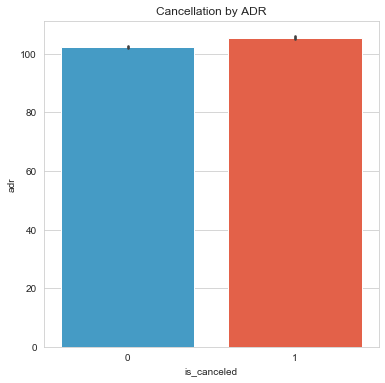

In [43]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by ADR')
sns.barplot(x='is_canceled',y='adr',data=df)
plt.show()

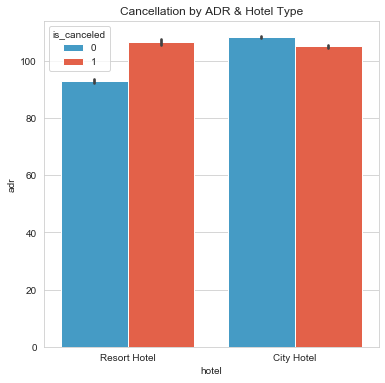

In [44]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by ADR & Hotel Type')
sns.barplot(x='hotel',y='adr',hue='is_canceled',data=df)
plt.show()

Observation :
- It looks like the cancellations in Resort Hotels had a higher ADR

### Does Market Segment affects cancelation?

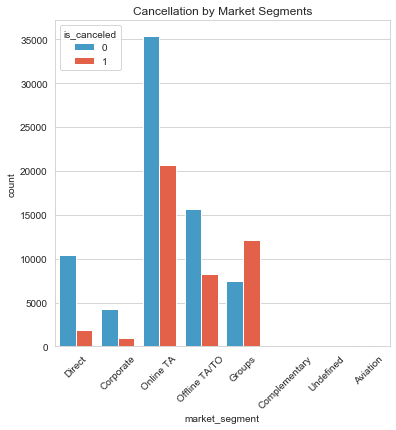

In [45]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Market Segments')
plt.xticks(rotation=45) 
sns.countplot(x='market_segment',hue='is_canceled',data=df)
plt.show()

In [46]:
df.market_segment.value_counts()

Online TA        56110
Offline TA/TO    23887
Groups           19558
Direct           12366
Corporate         5213
Aviation           231
Complementary       63
Undefined            2
Name: market_segment, dtype: int64

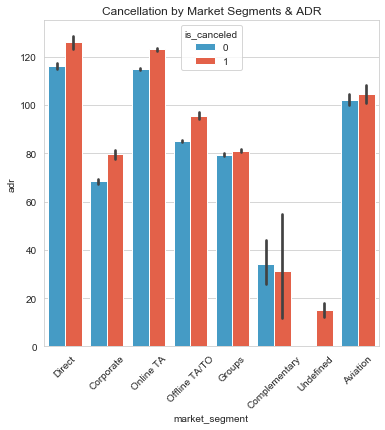

In [47]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Market Segments & ADR')
plt.xticks(rotation=45) 
sns.barplot(x='market_segment',y='adr',hue='is_canceled',data=df)
plt.show()

- The cancellation percentage of groups is higher than other segments

- The cancellation number of Online TA is higher than other segments

- Almost all canceled reservations have a higher ADR.

### Does distribution channels affects cancelation?

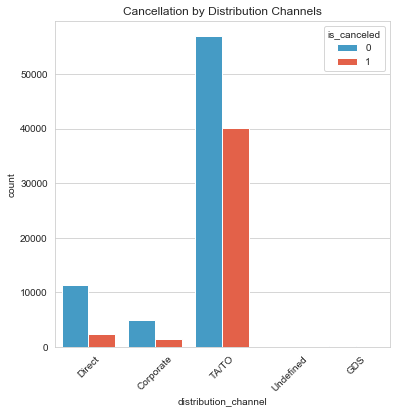

In [48]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Distribution Channels')
plt.xticks(rotation=45) 
sns.countplot(x='distribution_channel',hue='is_canceled',data=df)
plt.show()

In [49]:
df.distribution_channel.value_counts()

TA/TO        96913
Direct       13838
Corporate     6485
GDS            189
Undefined        5
Name: distribution_channel, dtype: int64

- Reservations from Travel Agents or Tour Operators are more likely to be canceled

### What is the busiest month and which month whose the number of cancelation is the highest?

Text(0.5, 0, 'Month')

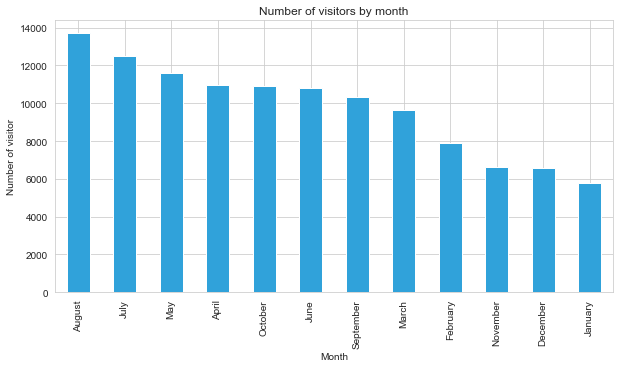

In [50]:
df.arrival_date_month.value_counts().nlargest(12).plot(kind = 'bar', figsize = (10,5))
plt.title('Number of visitors by month')
plt.ylabel('Number of visitor')
plt.xlabel('Month')

In [51]:
df_v = df.copy()
df_v['reservation_status_date'] = pd.to_datetime(df_v['reservation_status_date'], format='%Y-%m-%d')

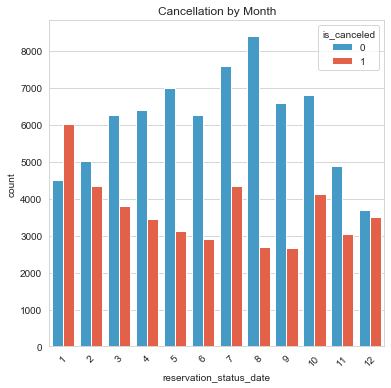

In [52]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Month')
plt.xticks(rotation=45) 
sns.countplot(x=df_v['reservation_status_date'].dt.month,hue='is_canceled',data=df_v)
plt.show()

Observation :
- August is the busiest month with the highest number of visitor
- I can conclude that numerous visitors come in Q3 of the year, it is understandable that people tend to go holiday in summer
- The lowest number of cancelation are in August and September
- January is the month of the least visitors also the month of the highest number of cancelation

## Feature Selection

In [53]:
df_le = df.copy()

### Correlation

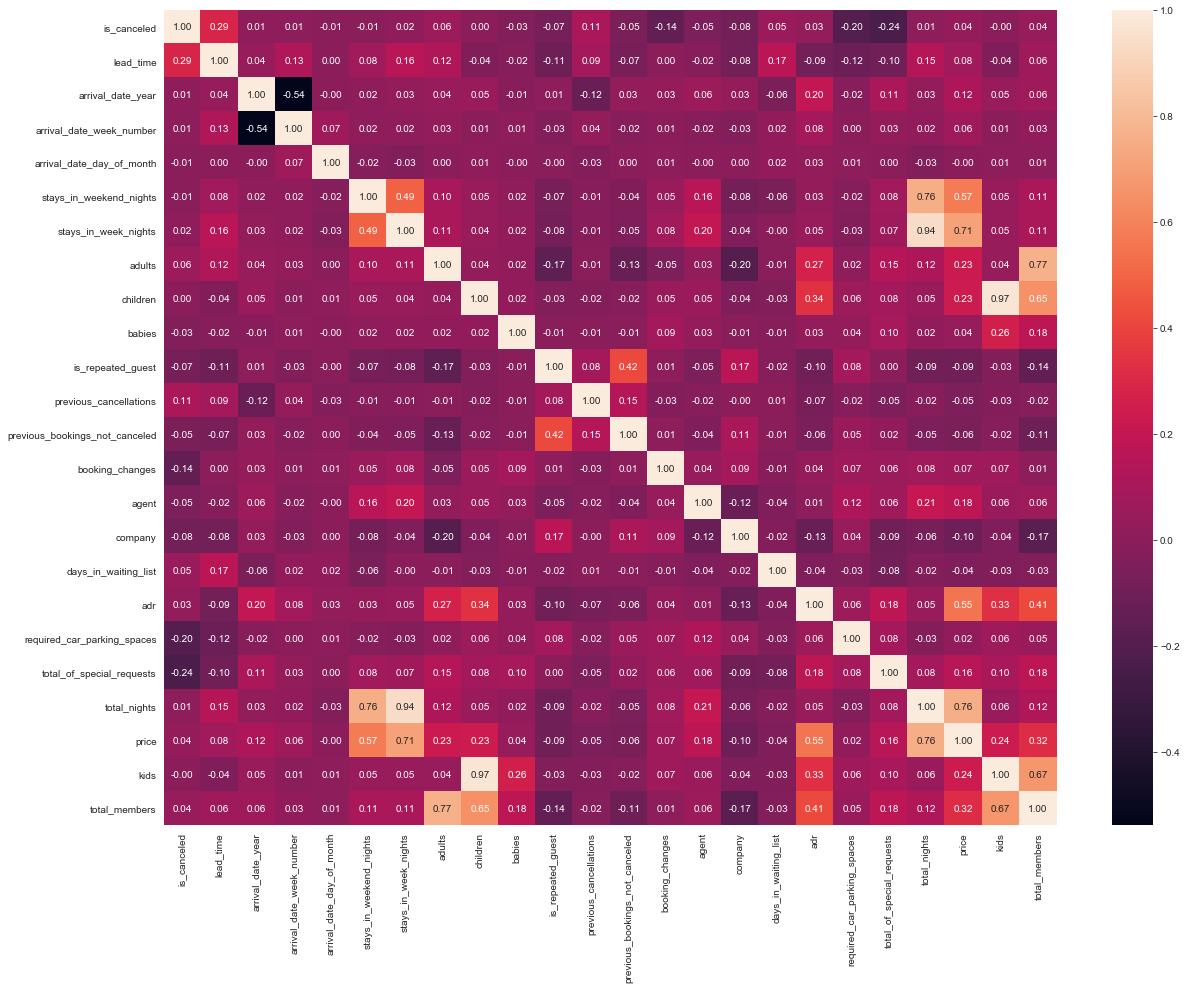

In [54]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_le.corr(), annot=True, fmt='.2f');

Observation:
- There is high correlation between total members and adults also with chidren
- And in the same, there is high correlation between total_nights and stays_in_week_nights
- High correlation also observed in total_nights and stays_in_weekend_nights
- So i will drop the total_members and total_nights

In [55]:
columns = [
    'reservation_status_date',
    'total_nights',
    'total_members',
]

df_le = df_le.drop(columns, axis=1)

In [56]:
columns = [
    'hotel','country'
]

df_le = df_le.drop(columns, axis=1)

In [57]:
df_le.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'price',
       'kids'],
      dtype='object')

### Dummy Variables

In [58]:
categoricals = [
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'agent',
    'company',
    'customer_type',
    'reservation_status']

In [59]:
new_categoricals = [col for col in categoricals if col in df_le.columns]
df_hot = pd.get_dummies(data=df_le, columns=new_categoricals)

In [60]:
X_hot = df_hot.drop('is_canceled', axis=1)
y = df_hot['is_canceled']

In [61]:
X_hot.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest',
       ...
       'company_530.0', 'company_531.0', 'company_534.0', 'company_539.0',
       'company_541.0', 'company_543.0', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party'],
      dtype='object', length=753)

### First Glance - Logistic Regression

In [62]:
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, roc_curve

In [63]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_hot, y, test_size=.3, random_state=42)

log = LogisticRegression().fit(X_train, y_train)
y_pred = log.predict(X_test)

In [66]:
log_acc = accuracy_score(y_test, y_pred)
print('Acc:',log_acc)

Acc: 0.7827358142439468


In [67]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.90      0.84     21964
           1       0.78      0.58      0.67     13265

    accuracy                           0.78     35229
   macro avg       0.78      0.74      0.75     35229
weighted avg       0.78      0.78      0.77     35229



In [68]:
cross_val_score(log, X_test, y_test, cv=5).mean()

0.7801243375429878

## Increase the cancelled booking samples

In [69]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.utils import resample

In [70]:
def select(X):
    selects = []
    
    selector = SelectKBest(chi2, k='all').fit(X, y)
    scores = selector.scores_
        
    q3 = np.quantile(scores, 0.75)
    q1 = np.quantile(scores, 0.25)
    iqr = q3 - q1
    threshold = q3 + 1.5 * iqr

    for col, val in zip(X.columns, scores):
        cond1 = val > threshold
        cond2 = col in df_hot.columns or col in df_hot.columns
        
        if cond1 and cond2:
            if col not in df_hot.columns:
                df_hot.loc[:, col] = 0
            selects.append(col)
        
    return selects

In [71]:
selects_hot = select(X_hot)

In [72]:
selected = df_hot[selects_hot + ['is_canceled']]

In [73]:
# separate majority and minority classes
major = selected[selected['is_canceled'] == 0]
minor = selected[selected['is_canceled'] == 1]

# downsample majority class
downsampled = resample(major, replace=False, n_samples=len(minor), random_state=123) 

# combine minority class with downsampled majority class
df_new = pd.concat([downsampled, minor])

# display new class counts
df_new['is_canceled'].value_counts()

1    44011
0    44011
Name: is_canceled, dtype: int64

In [74]:
df_hot['is_canceled'].value_counts()

0    73419
1    44011
Name: is_canceled, dtype: int64

In [75]:
X = df_new.drop('is_canceled', axis=1)
y = df_new['is_canceled']

In [76]:
X = df_new.drop('is_canceled', axis=1)
y = df_new['is_canceled']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [78]:
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, roc_curve

In [79]:
class Report:
    def __init__(self, X_test, y_test):
        self.X = X_test
        self.y = y_test
    
    def metrics(self, model):
        y_pred = model.predict(self.X)
        
        print('Accuracy score:\n')
        print(accuracy_score(self.y, y_pred))
        
        print('\nConfusion Matrix:\n')
        print(confusion_matrix(self.y, y_pred))
        
        print('\nClassification Report:\n')
        print(classification_report(self.y, y_pred))
    def plot_roc_curve(self, model, save=False):
        probs = model.predict_proba(self.X)
        preds = probs[:, 1]

        fpr, tpr, threshold = roc_curve(self.y, preds)
        roc_auc = auc(fpr, tpr)
        print(fpr,tpr)

        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([-0.1, 1], [-0.1, 1], 'r--')
        plt.xlim([-0.1, 1])
        plt.ylim([-0.1, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        
        if save:
            name = model.__class__.__name__
            plt.savefig(f'./images/{name}_{part}.png')
        plt.show()

In [80]:
report = Report(X_test, y_test)

In [109]:
log = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = log.predict(X_test)
log_acc = accuracy_score(y_test, y_pred)
print('Acc:',log_acc)
print(classification_report(y_test, y_pred))


Acc: 0.7629416442609914
              precision    recall  f1-score   support

           0       0.74      0.80      0.77     13215
           1       0.78      0.73      0.75     13192

    accuracy                           0.76     26407
   macro avg       0.76      0.76      0.76     26407
weighted avg       0.76      0.76      0.76     26407



[0.         0.         0.         ... 0.99984866 0.99984866 1.        ] [0.00000000e+00 7.58035173e-04 1.51607035e-03 ... 9.99924196e-01
 1.00000000e+00 1.00000000e+00]


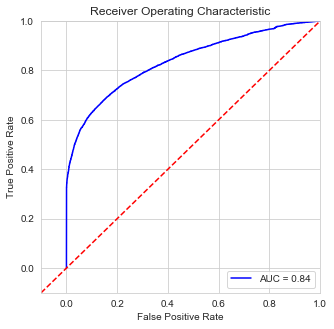

In [79]:
report.plot_roc_curve(log)

In [80]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.80      0.77     13215
           1       0.78      0.73      0.75     13192

    accuracy                           0.76     26407
   macro avg       0.76      0.76      0.76     26407
weighted avg       0.76      0.76      0.76     26407



In [81]:
cross_val_score(log, X_test, y_test, cv=5).mean()

0.7654030677729116

### Naive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

In [111]:
nb = GaussianNB().fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, y_pred)
print('Acc:',nb_acc)
print(classification_report(y_test, y_pred))

Acc: 0.7125383421062597
              precision    recall  f1-score   support

           0       0.73      0.68      0.70     13215
           1       0.70      0.74      0.72     13192

    accuracy                           0.71     26407
   macro avg       0.71      0.71      0.71     26407
weighted avg       0.71      0.71      0.71     26407



[0.         0.05569429 0.05576996 ... 0.87854711 0.87877412 1.        ] [0.         0.36999697 0.36999697 ... 0.99749848 0.99749848 1.        ]


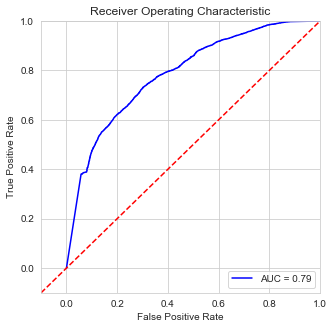

In [84]:
report.plot_roc_curve(nb)

In [85]:
cross_val_score(nb, X_test, y_test, cv=5).mean()

0.7100765598864454

### KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
print('Acc:',knn_acc)
print(classification_report(y_test, y_pred))

Acc: 0.7184079978793502
              precision    recall  f1-score   support

           0       0.71      0.74      0.72     13215
           1       0.73      0.70      0.71     13192

    accuracy                           0.72     26407
   macro avg       0.72      0.72      0.72     26407
weighted avg       0.72      0.72      0.72     26407



[0.         0.03238744 0.11676126 0.26432085 0.47529323 0.71577753
 1.        ] [0.         0.44655852 0.55533657 0.70110673 0.85187993 0.95353244
 1.        ]


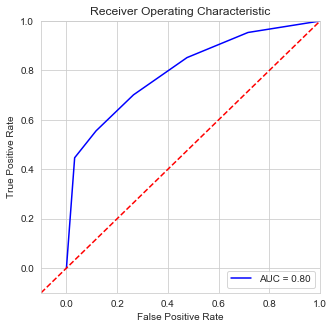

In [88]:
report.plot_roc_curve(knn)

In [89]:
cross_val_score(knn, X_test, y_test, cv=5).mean()

0.6841745332244554

### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [82]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
print('Acc:',rf_acc)
print(classification_report(y_test, y_pred))

Acc: 0.8512894308327338
              precision    recall  f1-score   support

           0       0.84      0.87      0.85     13215
           1       0.87      0.83      0.85     13192

    accuracy                           0.85     26407
   macro avg       0.85      0.85      0.85     26407
weighted avg       0.85      0.85      0.85     26407



[0.00000000e+00 3.78357927e-04 3.78357927e-04 ... 9.12599319e-01
 9.12674991e-01 1.00000000e+00] [0.         0.40380534 0.40395694 ... 0.99848393 0.99848393 1.        ]


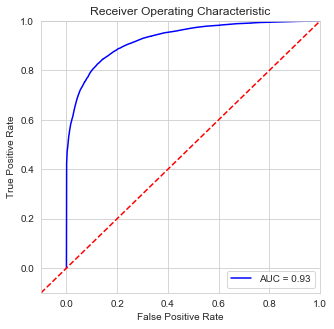

In [83]:
report.plot_roc_curve(rf)

In [84]:
cross_val_score(rf, X_test, y_test, cv=5).mean()

0.8295903505820306

### Gradient Boosting

In [114]:
gbm = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = gbm.predict(X_test)
gbm_acc = accuracy_score(y_test, y_pred)
print('Acc:',gbm_acc)
print(classification_report(y_test, y_pred))

Acc: 0.7942212292195251
              precision    recall  f1-score   support

           0       0.77      0.85      0.80     13215
           1       0.83      0.74      0.78     13192

    accuracy                           0.79     26407
   macro avg       0.80      0.79      0.79     26407
weighted avg       0.80      0.79      0.79     26407



[0.         0.         0.         ... 0.99765418 0.99780552 1.        ] [0.         0.00159187 0.00227411 ... 1.         1.         1.        ]


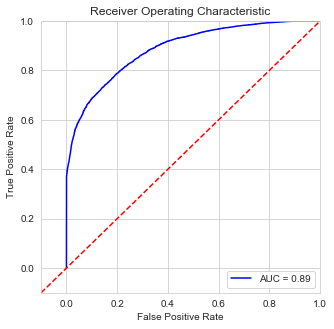

In [95]:
report.plot_roc_curve(gbm)

In [96]:
cross_val_score(gbm, X_test, y_test, cv=5).mean()

0.7947508951847482

### XGBoost

In [97]:
from xgboost import XGBClassifier

In [115]:
xgb = XGBClassifier().fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred)
print('Acc:',xgb_acc)
print(classification_report(y_test, y_pred))

Acc: 0.7942590979664483
              precision    recall  f1-score   support

           0       0.76      0.87      0.81     13215
           1       0.85      0.72      0.78     13192

    accuracy                           0.79     26407
   macro avg       0.80      0.79      0.79     26407
weighted avg       0.80      0.79      0.79     26407



[0.         0.         0.         ... 0.99825955 0.99848657 1.        ] [0.00000000e+00 6.82231656e-04 2.27410552e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


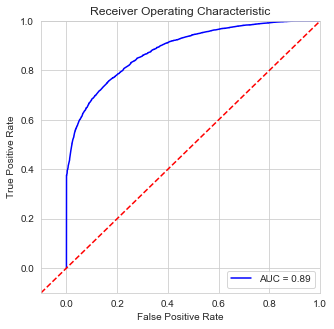

In [99]:
report.plot_roc_curve(xgb)

In [100]:
cross_val_score(xgb, X_test, y_test, cv=5).mean()


0.7925167208343572

### Summary

In [116]:
summary = pd.DataFrame({'Model': ['Logistic Regression - Baseline Model', 'Naive Bayes - Baseline Model', 'KNN - Baseline Model',
                                  'Random Forest - Baseline Model','Gradient Boosting - Baseline Model', 'XGBoost - Baseline Model'],
                      'Acc Score': [log_acc, nb_acc, knn_acc, rf_acc, gbm_acc, xgb_acc]})
print('Model Score Summary')
summary.sort_values(by = 'Acc Score', ascending = False).set_index('Model')

Model Score Summary


,Acc Score
Model,
Random Forest - Baseline Model,0.849964
XGBoost - Baseline Model,0.794259
Gradient Boosting - Baseline Model,0.794221
Logistic Regression - Baseline Model,0.762942
KNN - Baseline Model,0.718408
Naive Bayes - Baseline Model,0.712538


Text(0.5, 1.0, 'Accuracy Scores of Selected Models')

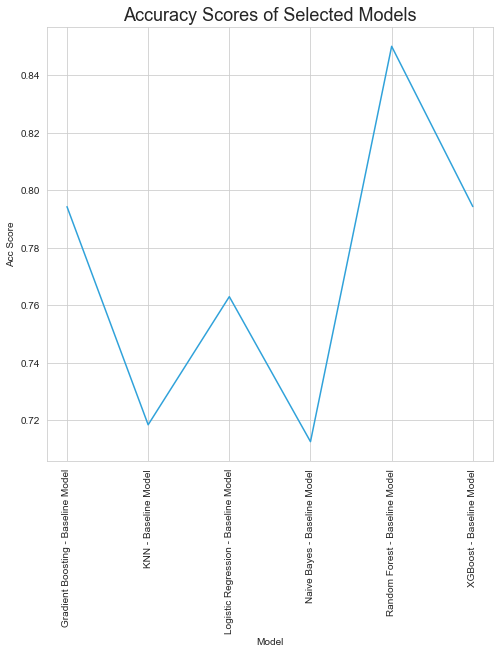

In [117]:
plt.figure(figsize=(8,8))
sns.lineplot(y=summary["Acc Score"], x=summary["Model"])
plt.xticks(rotation=90)
plt.title('Accuracy Scores of Selected Models',fontsize=18)

Observation = 
- We can see that the top 3 model which give the best results are Random Forest, Gradient Boosting, and XGBoost
- Therefore I will do hyperparameter tuning only for those mentioned model

## Hyperparameter Tuning

### Random Forest

In [133]:
rf_params = {
    'max_depth': [250, 100],
    'max_features': [15, 20],
    'n_estimators': [500,1000],
    'min_samples_split': [2, 5],
}

In [134]:
params = {
    'estimator': rf,
    'param_grid': rf_params,
    'cv': 5,
    'refit': False,
    'n_jobs': -1,
    'verbose': 2,
    'scoring': 'accuracy',
}
rf_cv = GridSearchCV(**params)

In [135]:
_ = rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 53.4min finished


In [136]:
rf_cv.best_params_

{'max_depth': 100,
 'max_features': 20,
 'min_samples_split': 2,
 'n_estimators': 500}

In [85]:
rf_tuned = RandomForestClassifier(max_depth=100,max_features=20,min_samples_split=2,n_estimators=500, random_state=42).fit(X_train, y_train)
y_pred_tuned = rf_tuned.predict(X_test)
rf_acc_tuned = accuracy_score(y_test, y_pred_tuned)
print('Acc:',rf_acc_tuned)
print(classification_report(y_test, y_pred_tuned))

Acc: 0.852728443215814
              precision    recall  f1-score   support

           0       0.84      0.87      0.86     13215
           1       0.87      0.84      0.85     13192

    accuracy                           0.85     26407
   macro avg       0.85      0.85      0.85     26407
weighted avg       0.85      0.85      0.85     26407



### Gradient Boosting

In [138]:
gbm_params = {
    'n_estimators': [100,500],
    'max_depth': [10,20],
    'min_samples_split': [5, 10],
}

In [139]:
params = {
    'estimator': gbm,
    'param_grid': gbm_params,
    'cv': 5,
    'refit': False,
    'n_jobs': -1,
    'verbose': 2,
    'scoring': 'accuracy',
}
gbm_cv = GridSearchCV(**params)

In [140]:
_ = gbm_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 84.5min finished


In [141]:
gbm_cv.best_params_

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 500}

In [142]:
gbm_tuned = GradientBoostingClassifier(max_depth=10,min_samples_split=5,n_estimators=500,).fit(X_train, y_train)
y_pred_tuned = gbm_tuned.predict(X_test)
gbm_acc_tuned = accuracy_score(y_test, y_pred_tuned)
print('Acc:',gbm_acc_tuned)
print(classification_report(y_test, y_pred_tuned))

Acc: 0.8519331995304276
              precision    recall  f1-score   support

           0       0.85      0.86      0.85     13215
           1       0.86      0.84      0.85     13192

    accuracy                           0.85     26407
   macro avg       0.85      0.85      0.85     26407
weighted avg       0.85      0.85      0.85     26407



### XGBoost

In [143]:
xgb_params = {
    'n_estimators': [100, 500],
    'max_depth': [10,20],
    'min_samples_split': [2, 5],
}

In [144]:
params = {
    'estimator': xgb,
    'param_grid': xgb_params,
    'cv': 5,
    'refit': False,
    'n_jobs': -1,
    'verbose': 2,
    'scoring': 'accuracy',
}
xgb_cv = GridSearchCV(**params)

In [145]:
_ = xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 53.8min finished


In [147]:
xgb_cv.best_params_

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}

In [148]:
xgb_tuned = GradientBoostingClassifier(max_depth=20,min_samples_split=2,n_estimators=100).fit(X_train, y_train)
y_pred_tuned = xgb_tuned.predict(X_test)
xgb_acc_tuned = accuracy_score(y_test, y_pred_tuned)
print('Acc:',xgb_acc_tuned)
print(classification_report(y_test, y_pred_tuned))

Acc: 0.8462907562388761
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     13215
           1       0.86      0.83      0.84     13192

    accuracy                           0.85     26407
   macro avg       0.85      0.85      0.85     26407
weighted avg       0.85      0.85      0.85     26407



In [149]:
summary = pd.DataFrame({'Model': ['Random Forest - Tuned','Gradient Boosting - Tuned', 'XGBoost - Tuned'],
                      'Acc Score Tuned': [rf_acc_tuned, gbm_acc_tuned, xgb_acc_tuned]})
print('Model Score Summary')
summary.sort_values(by = 'Acc Score Tuned', ascending = False).set_index('Model')

Model Score Summary


,Acc Score Tuned
Model,
Random Forest - Tuned,0.852728
Gradient Boosting - Tuned,0.851933
XGBoost - Tuned,0.846291


## Summarry

- As we can see, after tuning the model Random Forest is still the best model which give the highest accuracy result, but the Gradient Boosting and XGBoost give much better result adter tuning

In [86]:
import joblib

In [87]:
import pickle

In [88]:
from flask import Flask, request, render_template

In [90]:
df_new.tail()

,lead_time,arrival_date_week_number,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,price,arrival_date_month_April,arrival_date_month_February,arrival_date_month_January,arrival_date_month_June,arrival_date_month_March,arrival_date_month_November,meal_FB,meal_HB,meal_Undefined,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_TA/TO,reserved_room_type_A,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_I,assigned_room_type_K,deposit_type_No Deposit,deposit_type_Non Refund,agent_0.0,agent_1.0,agent_3.0,agent_6.0,agent_7.0,agent_8.0,agent_9.0,agent_12.0,agent_14.0,agent_16.0,agent_19.0,agent_20.0,agent_21.0,agent_22.0,agent_27.0,agent_28.0,agent_29.0,agent_31.0,agent_34.0,agent_36.0,agent_37.0,agent_40.0,agent_41.0,agent_42.0,agent_44.0,agent_56.0,agent_58.0,agent_68.0,agent_69.0,agent_85.0,agent_86.0,agent_89.0,agent_115.0,agent_119.0,agent_134.0,agent_138.0,agent_143.0,agent_146.0,agent_152.0,agent_154.0,agent_156.0,agent_162.0,agent_168.0,agent_170.0,agent_196.0,agent_220.0,agent_229.0,agent_235.0,agent_236.0,agent_241.0,agent_243.0,agent_248.0,agent_250.0,agent_251.0,agent_257.0,agent_286.0,agent_314.0,agent_323.0,agent_326.0,agent_330.0,agent_464.0,agent_492.0,agent_495.0,company_0.0,company_40.0,company_67.0,company_154.0,company_202.0,company_219.0,company_223.0,company_348.0,company_385.0,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,is_canceled
108829,25,18,1,1,0,1,0,1,0,0,125.0,0,0,375.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
111355,4,23,0,1,0,1,0,4,0,0,65.0,0,0,65.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
111924,7,22,1,1,0,1,0,1,0,0,65.0,0,0,65.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
111925,6,29,0,1,0,1,1,1,0,0,65.0,0,0,65.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
117295,0,31,2,1,0,1,0,0,0,0,65.0,0,1,130.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [92]:
rf_tuned.predict([[280,5,1,1,0,1,0,1,0,0,88.2,1,1,70,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])

array([0], dtype=int64)

In [95]:
rf_tuned.predict([[709,18,1,1,0,1,0,1,0,0,125.0,0,0,375.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])

array([1], dtype=int64)

In [94]:
joblib.dump(rf_tuned, 'Hotelbookingcancelation')

['Hotelbookingcancelation']

In [96]:
dummy = ['arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type','customer_type']
non_dummy = ['lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies','is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'company', 'days_in_waiting_list', 'adr','required_car_parking_spaces', 'total_of_special_requests', 'price',
       'kids']

In [98]:
def predict_cancel__(lead_time,
       arrival_date_week_number,
       stays_in_week_nights, adults, babies,
       is_repeated_guest, previous_cancellations,
       previous_bookings_not_canceled, booking_changes, days_in_waiting_list,adr,required_car_parking_spaces,
       total_of_special_requests, price,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,
       assigned_room_type,deposit_type, agent,company, customer_type):    
    
    month_index = np.where(X.columns==arrival_date_month)[0][0]
    meal_index = np.where(X.columns==meal)[0][0]    
    market_segment_index = np.where(X.columns==market_segment)[0][0]    
    distribution_channel_index = np.where(X.columns==distribution_channel)[0][0]
    reserved_room_type_index = np.where(X.columns==reserved_room_type)[0][0]
    assigned_room_type_index = np.where(X.columns==assigned_room_type)[0][0] 
    deposit_type_index = np.where(X.columns==deposit_type)[0][0]
    customer_type_index = np.where(X.columns==customer_type)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = lead_time
    x[1] = arrival_date_week_number
    x[2] = stays_in_week_nights
    x[3] = adults
    x[4] = babies
    x[5] = is_repeated_guest
    x[6] = previous_cancellations
    x[7] = previous_bookings_not_canceled
    x[8] = booking_changes
    x[9] = days_in_waiting_list
    x[10] = adr
    x[11] = required_car_parking_spaces
    x[12] = total_of_special_requests
    x[13] = price

    if month_index >= 0:
        x[month_index] = 1
        
    if meal_index >= 0:
        x[meal_index] = 1
        
    if market_segment_index >= 0:
        x[market_segment_index] = 1
    
    if distribution_channel_index >= 0:
        x[distribution_channel_index] = 1

    if reserved_room_type_index >= 0:
        x[reserved_room_type_index] = 1
        
    if assigned_room_type_index >= 0:
        x[assigned_room_type_index] = 1
        
    if deposit_type_index >= 0:
        x[deposit_type_index] = 1

    if customer_type_index >= 0:
        x[customer_type_index] = 1
        
    return rf_tuned.predict([x])[0]

In [99]:
predict_cancel__(42,13,1,2,0,0,0,0,0,0,88.2,0,0,88.2,'arrival_date_month_April','meal_FB','market_segment_Groups','distribution_channel_TA/TO',
                'reserved_room_type_A','assigned_room_type_A', 'deposit_type_No Deposit', 'agent_0.0', 'company_0.0','customer_type_Transient')

0

In [100]:
predict_cancel__(28,2,1,1,0,1,0,4,0,0,125.0,0,0,375.0,'arrival_date_month_April','meal_FB','market_segment_Corporate','distribution_channel_Corporate',
                'reserved_room_type_E','assigned_room_type_F', 'deposit_type_No Deposit', 'agent_0.0', 'company_40.0','customer_type_Transient')

1

In [101]:
joblib.dump(rf_tuned, 'Hotelbookingcancelation')

['Hotelbookingcancelation']